In [33]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import sklearn
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [5]:
train = pd.read_csv('Train/twitter_train_AV.csv')
test = pd.read_csv('Test/twitter_test_AV.csv')

In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
# user defined method to remove unwanted pattern in our tweets. takes two arguments one is original text and other is pattern we dont want.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [9]:
# remove twitter handles (@user)
train['tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")

test['tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*")

In [10]:
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [12]:
# remove special characters, numbers, punctuations
train['tweet'] = train['tweet'].str.replace("[^a-zA-Z#]", " ")

test['tweet'] = test['tweet'].str.replace("[^a-zA-Z#]", " ")
train.head()
#test.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide society now #motivation


In [13]:
# remove short words.
train['tweet'] = train['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

test['tweet'] = test['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

train.head()


,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids i...
1,2,0,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty
3,4,0,#model love take with time
4,5,0,factsguide society #motivation


In [14]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone #birds #mov...
2,31965,safe ways heal your #acne #altwaystoheal #heal...
3,31966,cursed child book reservations already where w...
4,31967,#bihday amazing hilarious #nephew ahmir uncle ...


In [15]:
#tokenization 
tokenized_train = train['tweet'].apply(lambda x: x.split())

tokenized_test = test['tweet'].apply(lambda x: x.split())

tokenized_train.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweet, dtype: object

In [16]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_train = tokenized_train.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_train.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweet, dtype: object

In [17]:
# Stemming for test data

tokenized_test = tokenized_test.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_test.head()

0    [#studiolif, #aislif, #requir, #passion, #dedi...
1    [#white, #supremacist, want, everyon, #bird, #...
2    [safe, way, heal, your, #acn, #altwaystoh, #he...
3    [curs, child, book, reserv, alreadi, where, wh...
4    [#bihday, amaz, hilari, #nephew, ahmir, uncl, ...
Name: tweet, dtype: object

In [18]:
# now joint this tokens together.
for i in range(len(tokenized_train)):
    tokenized_train[i] = ' '.join(tokenized_train[i])

train['tweet'] = tokenized_train

In [19]:
train.head()

,id,label,tweet
0,1,0,when father dysfunct selfish drag kid into dys...
1,2,0,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesti
3,4,0,#model love take with time
4,5,0,factsguid societi #motiv


In [20]:
# same for test data
for i in range(len(tokenized_test)):
    tokenized_test[i] = ' '.join(tokenized_test[i])

test['tweet'] = tokenized_test

In [21]:
test.head()

,id,tweet
0,31963,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,#white #supremacist want everyon #bird #movi here
2,31965,safe way heal your #acn #altwaystoh #healthi #...
3,31966,curs child book reserv alreadi where when #har...
4,31967,#bihday amaz hilari #nephew ahmir uncl dave lo...


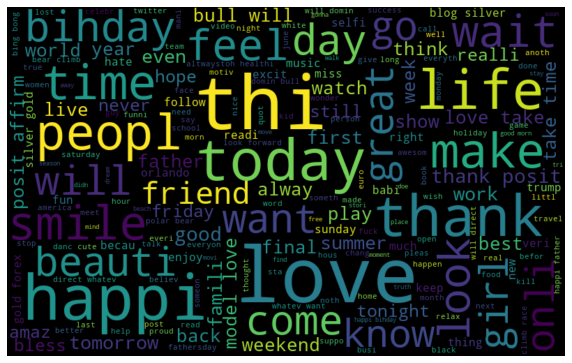

In [22]:
#Understanding the common words used in the tweets: WordCloud (train data)
all_words = ' '.join([text for text in train['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

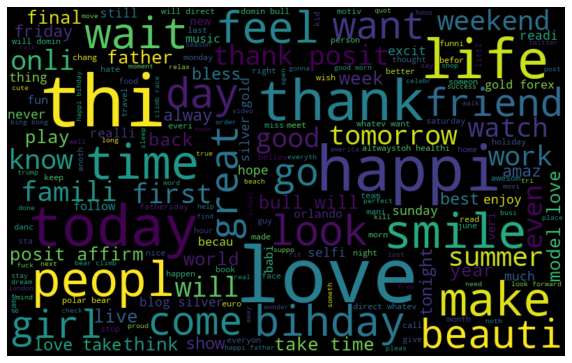

In [23]:
# Words in non racist/sexist tweets (train data)
normal_words = ' '.join([text for text in train['tweet'][train['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

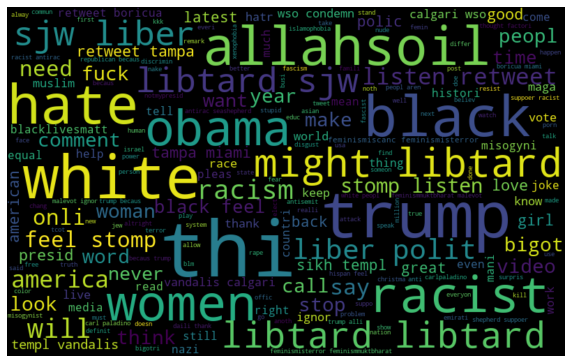

In [24]:
negative_words = ' '.join([text for text in train['tweet'][train['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
# Understanding the impact of Hashtags on tweets sentiment

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [26]:
# extracting hashtags from non racist tweets

HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

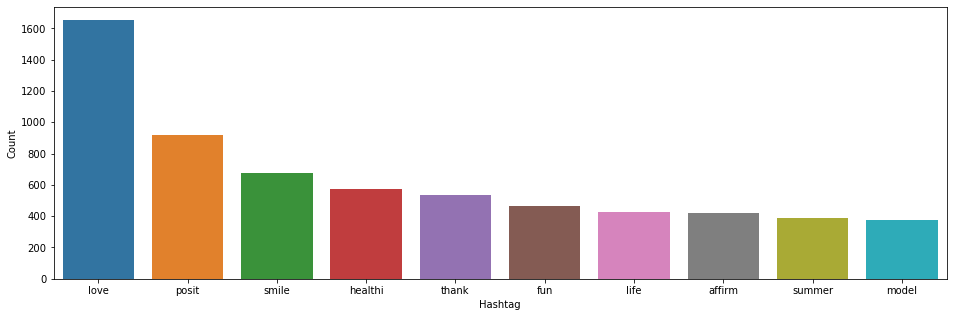

In [27]:
# Lets check hashtags in Non-Racist/Sexist Tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

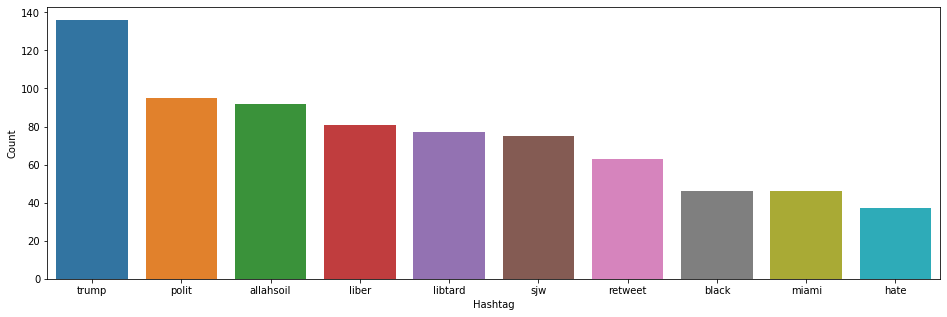

In [28]:
# Lets check hashtags in Racist/Sexist Tweets
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [30]:
test.head()

,id,tweet
0,31963,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,#white #supremacist want everyon #bird #movi here
2,31965,safe way heal your #acn #altwaystoh #healthi #...
3,31966,curs child book reserv alreadi where when #har...
4,31967,#bihday amaz hilari #nephew ahmir uncl dave lo...


In [54]:
# Extracting Features from Cleaned Tweets (Bag of Words Features)
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow_train = bow_vectorizer.fit_transform(train['tweet'])
bow_test = bow_vectorizer.fit_transform(test['tweet'])

In [95]:
print(bow_test)

  (0, 628)	1
  (1, 971)	1
  (1, 952)	1
  (1, 272)	1
  (1, 80)	1
  (1, 573)	1
  (2, 743)	1
  (2, 957)	1
  (2, 402)	2
  (2, 26)	1
  (2, 404)	1
  (3, 132)	1
  (3, 95)	1
  (3, 25)	1
  (3, 299)	1
  (4, 78)	1
  (4, 28)	1
  (4, 523)	1
  (4, 561)	1
  (5, 137)	1
  (6, 802)	1
  (6, 441)	1
  (6, 220)	1
  (6, 284)	1
  (6, 588)	1
  :	:
  (17192, 488)	1
  (17193, 502)	1
  (17193, 303)	1
  (17193, 962)	1
  (17193, 238)	1
  (17194, 896)	1
  (17194, 502)	1
  (17194, 982)	2
  (17194, 932)	1
  (17194, 117)	1
  (17194, 413)	1
  (17194, 607)	1
  (17195, 730)	1
  (17195, 391)	1
  (17195, 983)	2
  (17195, 557)	2
  (17195, 170)	1
  (17195, 486)	1
  (17195, 192)	1
  (17195, 218)	1
  (17195, 614)	1
  (17196, 333)	1
  (17196, 355)	1
  (17196, 804)	1
  (17196, 235)	1


In [55]:
print(bow[:5])

  (0, 296)	1
  (0, 457)	1
  (0, 738)	1
  (1, 876)	1
  (1, 128)	1
  (1, 599)	1
  (2, 78)	1
  (3, 554)	1
  (3, 514)	1
  (3, 886)	1
  (4, 792)	1
  (4, 563)	1


In [56]:
# Building model using TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf_train = tfidf_vectorizer.fit_transform(train['tweet'])
tfidf_test = tfidf_vectorizer.fit_transform(test['tweet'])

In [58]:
print(tfidf_test[:5])

  (0, 628)	1.0
  (1, 573)	0.4797698782898371
  (1, 80)	0.5364994664813383
  (1, 272)	0.4192251165933958
  (1, 952)	0.35164756480632714
  (1, 971)	0.4272978798613772
  (2, 404)	0.282073109179725
  (2, 26)	0.3241817119419829
  (2, 402)	0.6815018687059851
  (2, 957)	0.42151694320757516
  (2, 743)	0.4161966461412686
  (3, 299)	0.5307594327817686
  (3, 25)	0.4923757294176233
  (3, 95)	0.4424744596480601
  (3, 132)	0.5292229380448243
  (4, 561)	0.5799182741221772
  (4, 523)	0.33814206662930213
  (4, 28)	0.5625464134968623
  (4, 78)	0.48259327676278013


In [61]:
# splitting data into training and validation set
from sklearn.model_selection import train_test_split
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_train, train['label'], random_state=42, test_size=0.3)

xtrain_tfidf = tfidf_train[ytrain.index]
xvalid_tfidf = tfidf_train[yvalid.index]

In [79]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(ytrain)
Test_Y = Encoder.fit_transform(yvalid)

In [84]:
# model training and prediction
from sklearn import model_selection, naive_bayes

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(xtrain_tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(xvalid_tfidf)

In [88]:
from sklearn.metrics import accuracy_score
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  94.32683282928356
